# Interacting with Web APIs
Problem Statement: Analyzing Weather Data from OpenWeatherMap API
Dataset: Weather data retrieved from OpenWeatherMap API
Description: The goal is to interact with the OpenWeatherMap API to retrieve weather data
for a specific location and perform data modeling and visualization to analyze weather
patterns over time.
Tasks to Perform:
1. Register and obtain API key from OpenWeatherMap.
2. Interact with the OpenWeatherMap API using the API key to retrieve weather data for
a specific location.
3. Extract relevant weather attributes such as temperature, humidity, wind speed, and
precipitation from the API response.
4. Clean and preprocess the retrieved data, handling missing values or inconsistent
formats.
5. Perform data modeling to analyze weather patterns, such as calculating average
temperature, maximum/minimum values, or trends over time.
6. Visualize the weather data using appropriate plots, such as line charts, bar plots, or
scatter plots, to represent temperature changes, precipitation levels, or wind speed
variations.
7. Apply data aggregation techniques to summarize weather statistics by specific time
periods (e.g., daily, monthly, seasonal).
8. Incorporate geographical information, if available, to create maps or geospatial
visualizations representing weather patterns across different locations.
9. Explore and visualize relationships between weather attributes, such as temperature
and humidity, using correlation plots or heatmaps.

In [1]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://api.openweathermap.org/data/2.5/forecast?lat=44.34&lon=10.99&appid=30e664748dc4a7e9b424b7ff40c598bc' # <-- This is app id also known as api key, which you have to generate your own, and paste it here

#vurl ='https://api.openweathermap.org/data/2.5/weather?lat=44.34&lon=10.99&appid=307d11bca480dd730d99187c926&city_name=London'
response = requests.get(url)
data = response.json()
pretty_json = json.dumps(data,indent=4)
print(pretty_json)

{
    "cod": "200",
    "message": 0,
    "cnt": 40,
    "list": [
        {
            "dt": 1730840400,
            "main": {
                "temp": 279.4,
                "feels_like": 278.6,
                "temp_min": 279.4,
                "temp_max": 281.01,
                "pressure": 1026,
                "sea_level": 1026,
                "grnd_level": 958,
                "humidity": 94,
                "temp_kf": -1.61
            },
            "weather": [
                {
                    "id": 803,
                    "main": "Clouds",
                    "description": "broken clouds",
                    "icon": "04n"
                }
            ],
            "clouds": {
                "all": 68
            },
            "wind": {
                "speed": 1.44,
                "deg": 222,
                "gust": 0.76
            },
            "visibility": 10000,
            "pop": 0,
            "sys": {
                "pod": "n"
            },
         

In [3]:
date_time = data['list'][0]['dt_txt']
date_time

'2024-11-05 21:00:00'

# Extract relevant weather attributes such as temperature, humidity, wind speed, and precipitation from the API response.

In [4]:
data_struct = []
for record in data['list']:
    temp = record['main']['temp']
    humid = record['main']['humidity']
    wind_speed = record['wind']['speed']
    desp =record['weather'][0]['description'] 
    date_time = record['dt_txt']
    data_struct.append({'Temperature':temp,'Humidity':humid,'Wind Speed':wind_speed,'Weather Description':desp,'Date Time':date_time})
    
data_df = pd.DataFrame(data_struct)
data_df[['Date','Time']] = data_df['Date Time'].str.split(' ',expand=True)
data_df.head()

,Temperature,Humidity,Wind Speed,Weather Description,Date Time,Date,Time
0,279.40,94,1.44,broken clouds,2024-11-05 21:00:00,2024-11-05,21:00:00
1,279.88,91,1.16,broken clouds,2024-11-06 00:00:00,2024-11-06,00:00:00
2,280.35,84,1.21,overcast clouds,2024-11-06 03:00:00,2024-11-06,03:00:00
3,279.95,82,1.24,overcast clouds,2024-11-06 06:00:00,2024-11-06,06:00:00
4,284.44,69,1.07,overcast clouds,2024-11-06 09:00:00,2024-11-06,09:00:00


In [5]:
data_df.shape

(40, 7)

# Clean and preprocess the retrieved data, handling missing values or inconsistent formats.

In [6]:
data_df.isnull().sum()

Temperature            0
Humidity               0
Wind Speed             0
Weather Description    0
Date Time              0
Date                   0
Time                   0
dtype: int64

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature          40 non-null     float64
 1   Humidity             40 non-null     int64  
 2   Wind Speed           40 non-null     float64
 3   Weather Description  40 non-null     object 
 4   Date Time            40 non-null     object 
 5   Date                 40 non-null     object 
 6   Time                 40 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 2.3+ KB


# Perform data modeling to analyze weather patterns, such as calculating average temperature, maximum/minimum values, or trends over time.

In [8]:
data_df.describe()

,Temperature,Humidity,Wind Speed
count,40.000000,40.000000,40.000000
mean,281.641500,81.200000,1.441750
std,2.435707,11.721556,0.329871
min,278.420000,56.000000,0.760000
25%,279.657500,74.000000,1.240000
50%,280.350000,83.000000,1.335000
75%,284.010000,92.000000,1.677500
max,286.410000,95.000000,2.270000


# Visualize the weather data using appropriate plots, such as line charts, bar plots, or scatter plots, to represent temperature changes, precipitation levels, or wind speed variations.

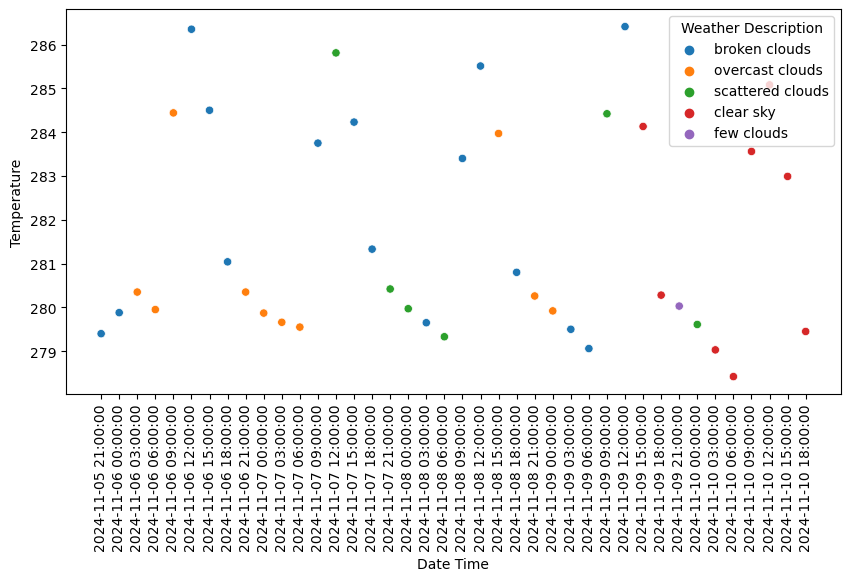

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,5))
sns.scatterplot(x=data_df['Date Time'],
                y=data_df['Temperature'],
                hue=data_df['Weather Description'])

plt.xticks(rotation=90);

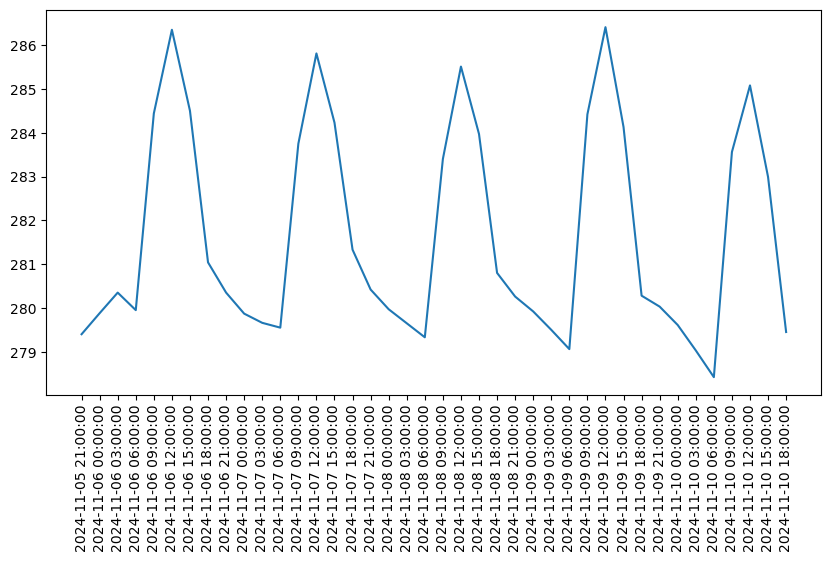

In [10]:
plt.figure(figsize=(10,5))
plt.plot(data_df['Date Time'],data_df['Temperature'])
plt.xticks(rotation=90);

# Apply data aggregation techniques to summarize weather statistics by specific time periods (e.g., daily, monthly, seasonal).

In [11]:
data_df.groupby('Date').agg({'Temperature' : 'mean','Wind Speed':'mean'})

,Temperature,Wind Speed
Date,,
2024-11-05,279.400000,1.440000
2024-11-06,282.107500,1.290000
2024-11-07,281.827500,1.377500
2024-11-08,281.611250,1.406250
2024-11-09,281.718750,1.608750
2024-11-10,281.162857,1.538571


In [12]:
data_df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Weather Description',
       'Date Time', 'Date', 'Time'],
      dtype='object')

# Explore and visualize relationships between weather attributes, such as temperature and humidity, using correlation plots or heatmaps.

<Axes: >

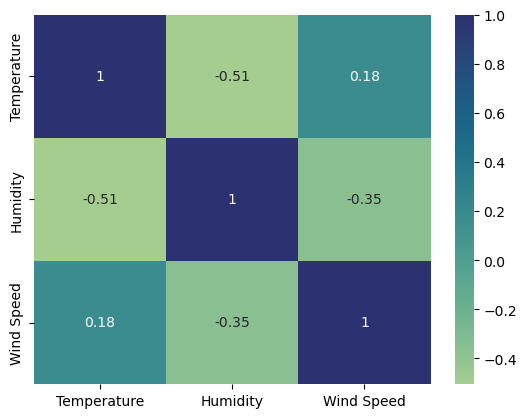

In [13]:
sns.heatmap(data_df[['Temperature','Humidity','Wind Speed']].corr(),annot=True,cmap='crest')